In [1]:
from pyrosm import OSM, get_data
import pyrosm
import osmnx as ox

# Initialize the reader
osm = OSM('../data/planet_4.2624,50.357_4.5933,50.4882.osm.pbf') # downloaded from BBBike

In [2]:
source_address = "Rue Turenne 11, Charleroi"
target_address = "Rue du Philosophe 3, Charleroi"

In [3]:
type(osm)

pyrosm.pyrosm.OSM

In [ ]:
# Get all walkable roads and the nodes 
nodes, edges = osm.get_network(nodes=True)

# Check first rows in the edge 
edges.head()

,access,bicycle,bridge,busway,cycleway,foot,footway,highway,int_ref,junction,...,width,id,timestamp,version,tags,osm_type,geometry,u,v,length
0,None,None,None,None,None,None,None,primary,None,roundabout,...,None,197574,0,0,"{""visible"":false,""maxspeed:type"":""sign""}",way,"LINESTRING (4.52797 50.45663, 4.52794 50.45655)",1547383,1103037320,8.730
1,None,None,None,None,None,None,None,primary,None,roundabout,...,None,197574,0,0,"{""visible"":false,""maxspeed:type"":""sign""}",way,"LINESTRING (4.52794 50.45655, 4.52794 50.45648)",1103037320,38464169,8.488
2,None,None,None,None,None,None,None,trunk,None,None,...,None,4309819,0,0,"{""visible"":false,""destination"":""Gosselies"",""op...",way,"LINESTRING (4.52831 50.45680, 4.52819 50.45682)",1547382,9630157482,8.603
3,None,None,None,None,None,None,None,trunk,None,None,...,None,4309819,0,0,"{""visible"":false,""destination"":""Gosselies"",""op...",way,"LINESTRING (4.52819 50.45682, 4.52809 50.45685)",9630157482,9630157485,8.411
4,None,None,None,None,None,None,None,trunk,None,None,...,None,4309819,0,0,"{""visible"":false,""destination"":""Gosselies"",""op...",way,"LINESTRING (4.52809 50.45685, 4.52799 50.45694)",9630157485,1152757218,11.788


In [2]:
# Create NetworkX graph
G = osm.to_graph(nodes, edges, graph_type='networkx')

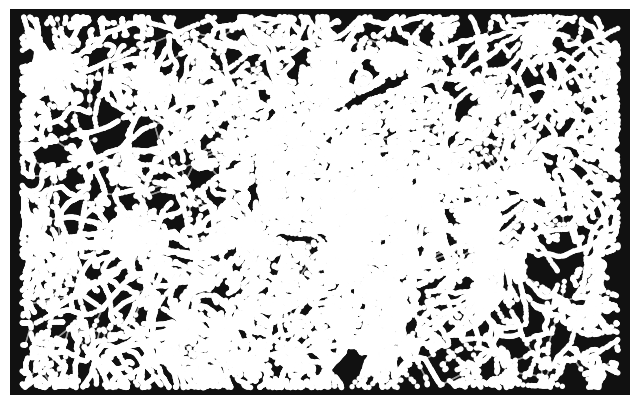

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
ox.plot_graph(G)

In [4]:
source = ox.geocode(source_address)
target = ox.geocode(target_address)

In [5]:
print(source, target)

(50.41187065, 4.442546876208652) (50.45697395, 4.46296142124077)


In [6]:
# Find the closest nodes from the graph
source_node = ox.nearest_nodes(G, source[1], source[0])
target_node = ox.nearest_nodes(G, target[1], target[0])

In [7]:
source_node, target_node

(5523847758, 11514018064)

In [8]:
nx.shortest_path?

Object `nx.shortest_path` not found.


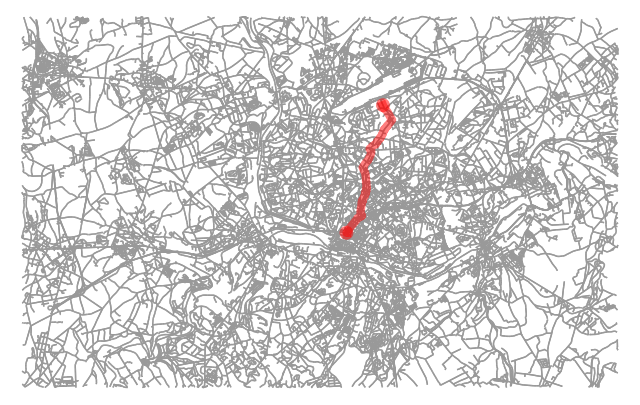

In [23]:
# Find shortest path (by distance)
import networkx as nx
route = nx.shortest_path(G, source_node, target_node, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='w')

In [10]:
{i:G.nodes[i] for i in route}

{5523847758: {'x': 4.442538261413574,
  'visible': False,
  'y': 50.411746978759766,
  'timestamp': 0,
  'tags': None,
  'changeset': 0,
  'version': 0,
  'osmid': 5523847758,
  'geometry': <POINT (4.443 50.412)>},
 7887954391: {'x': 4.44285249710083,
  'visible': False,
  'y': 50.411739349365234,
  'timestamp': 0,
  'tags': None,
  'changeset': 0,
  'version': 0,
  'osmid': 7887954391,
  'geometry': <POINT (4.443 50.412)>},
 627185099: {'x': 4.443012237548828,
  'visible': False,
  'y': 50.4117317199707,
  'timestamp': 0,
  'tags': None,
  'changeset': 0,
  'version': 0,
  'osmid': 627185099,
  'geometry': <POINT (4.443 50.412)>},
 5523847757: {'x': 4.443023204803467,
  'visible': False,
  'y': 50.41177749633789,
  'timestamp': 0,
  'tags': {'crossing': 'marked', 'highway': 'crossing'},
  'changeset': 0,
  'version': 0,
  'osmid': 5523847757,
  'geometry': <POINT (4.443 50.412)>},
 5523847756: {'x': 4.44304084777832,
  'visible': False,
  'y': 50.41183853149414,
  'timestamp': 0,
  't

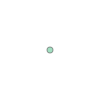

In [11]:
G.nodes[11514018064]['geometry']

In [12]:
import momepy
import pandas as pd
import geopandas as gpd
from shapely import LineString

/home/su530201/.local/share/virtualenvs/GSDMA_2024-TVyaM9eC/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
gdf = gpd.GeoDataFrame.from_dict({i:G.nodes[i] for i in route}, orient='index', crs='epsg:4326')

<Axes: >

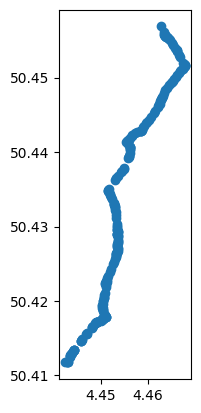

In [19]:
gdf.plot()

In [20]:
gdf.explore()

In [21]:
gdf_route = gpd.GeoDataFrame.from_dict({'route': {'id': f'from {source_address} to {target_address}', 'geometry': LineString([[G.nodes[i]['x'], G.nodes[i]['y']] for i in route])}}, orient='index', crs='epsg:4326')

In [22]:
gdf_route.explore()

In [24]:
nodes = momepy.nx_to_gdf(G, lines=True)

/tmp/ipykernel_66920/1581833358.py:1: UserWarning: Approach is not set. Defaulting to 'primal'.
  nodes = momepy.nx_to_gdf(G, lines=True)


In [25]:
#ox.geocode_to_gdf([f'R{i}' for i in route], by_osmid=True)

InsufficientResponseError: Nominatim geocoder returned 0 results for query 'R5523847758'